<a href="https://colab.research.google.com/github/Deykoz/Machine-Learning-projects/blob/main/RNN_weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weather Prediction using RNN**

Weather prediction is a crucial aspect of daily life, influencing decisions related to agriculture, transportation, and various outdoor activities. In this project, we aim to predict the maximum temperature (**temp_max**) based on historical weather data, including variables such as temperature, precipitation, wind speed, and temperature minima.

To tackle this prediction problem, we utilize a Recurrent Neural Network (RNN), which is particularly effective for time series data, as it can capture the temporal dependencies present in the weather data. By training an RNN on historical data, we aim to learn the underlying patterns in the weather conditions that can be used to predict the future maximum temperature.

The dataset used for this project includes daily weather records, and our approach focuses on building a model that can predict the temperature for the next day based on the current and past conditions. The goal is to create a reliable model that generalizes well to unseen data, providing accurate temperature predictions.

Through this project, we explore key concepts in time series forecasting, data preprocessing, and neural network architecture, ultimately contributing to more efficient and accurate weather forecasting systems.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
# prompt: donne moi toutes les valeurs differentes de la colonne weather du dataframe df

print(df['weather'].unique())

['drizzle' 'rain' 'sun' 'snow' 'fog']


# **Data preparation**

We check if their is any missing values

In [ ]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


We will check if there is some duplicate measurement in our data with

In [ ]:
df.duplicated().sum()

0

No missing value found.

# **EDA**

Statistics on the data

In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
# prompt: Affiche le premier et dernier élément de la colonne date et calcule le nombre de jour

# Convert 'date' column to datetime objects if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])

# Display the first and last dates
first_date = df['date'].min()
last_date = df['date'].max()

print(f"First date: {first_date}")
print(f"Last date: {last_date}")

# Calculate the number of days
days_diff = (last_date - first_date).days
print(f"Number of days: {days_diff}")

First date: 2012-01-01 00:00:00
Last date: 2015-12-31 00:00:00
Number of days: 1460


Those data are the weather features from the 2012-01-01 to the 2015-12-31 so  1460 days which correspond of the number of lines that we have.

**Histograms**

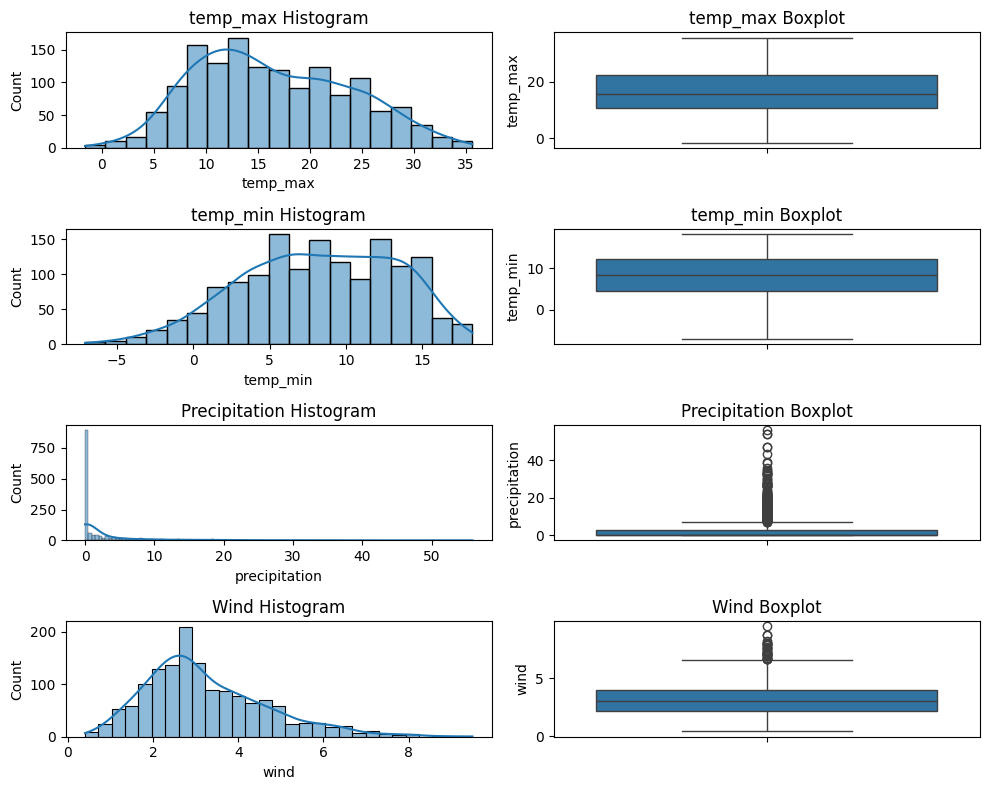

In [ ]:
# prompt: Affiche dans un subplot les histogrammes a coté de son boxplots de temp_max, temp_min, precipitation, wind

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in your provided code

fig, axes = plt.subplots(4, 2, figsize=(10, 8))

# Temp_max
sns.histplot(ax=axes[0, 0], x=df['temp_max'], kde=True)  # Histogram
sns.boxplot(ax=axes[0, 1], y=df['temp_max'])  # Boxplot
axes[0, 0].set_title('temp_max Histogram')
axes[0, 1].set_title('temp_max Boxplot')

# Temp_min
sns.histplot(ax=axes[1, 0], x=df['temp_min'], kde=True)
sns.boxplot(ax=axes[1, 1], y=df['temp_min'])
axes[1, 0].set_title('temp_min Histogram')
axes[1, 1].set_title('temp_min Boxplot')


# Precipitation
sns.histplot(ax=axes[2, 0], x=df['precipitation'], kde=True)
sns.boxplot(ax=axes[2, 1], y=df['precipitation'])
axes[2, 0].set_title('Precipitation Histogram')
axes[2, 1].set_title('Precipitation Boxplot')


# Wind
sns.histplot(ax=axes[3, 0], x=df['wind'], kde=True)
sns.boxplot(ax=axes[3, 1], y=df['wind'])
axes[3, 0].set_title('Wind Histogram')
axes[3, 1].set_title('Wind Boxplot')


plt.tight_layout()
plt.show()

**Comments**

The histograms reveal that temperature maxima are normally distributed, centered around 15 degrees, with a few extreme values.
 Similarly, temperature minima exhibit a normal distribution, centered around 5 degrees.

 Precipitation data, however, is positively skewed, indicating a higher frequency of lower precipitation levels and a few instances of heavy rainfall.

 Wind speed also follows a normal distribution, centered around 4 units.

The temperature boxplots show a relatively small interquartile range, suggesting a narrow range of temperatures, while the precipitation boxplot reveals a large number of outliers, indicating significant variability in rainfall.

Overall, these visualizations suggest a climate with mild temperatures and relatively low wind speeds, but with occasional periods of heavy rainfall

**Test the normal distribution of temp_max et temp_min**

In [ ]:
# prompt: Effectue un test pour vérifier si temp_max et temp_min suivent une normal distribution

from scipy import stats

# Perform Shapiro-Wilk test for normality
shapiro_temp_max = stats.shapiro(df['temp_max'])
shapiro_temp_min = stats.shapiro(df['temp_min'])

print("Shapiro-Wilk test for temp_max:", shapiro_temp_max)
print("Shapiro-Wilk test for temp_min:", shapiro_temp_min)

# Perform D’Agostino’s K^2 test for normality
dagostino_temp_max = stats.normaltest(df['temp_max'])
dagostino_temp_min = stats.normaltest(df['temp_min'])

print("\nD'Agostino's K^2 test for temp_max:", dagostino_temp_max)
print("D'Agostino's K^2 test for temp_min:", dagostino_temp_min)


# Interpretation (example)
alpha = 0.05  # significance level

print("\nInterpretation:")
if shapiro_temp_max.pvalue > alpha:
    print("temp_max: Sample looks Gaussian (fail to reject H0)")
else:
    print("temp_max: Sample does not look Gaussian (reject H0)")

if shapiro_temp_min.pvalue > alpha:
    print("temp_min: Sample looks Gaussian (fail to reject H0)")
else:
    print("temp_min: Sample does not look Gaussian (reject H0)")

Shapiro-Wilk test for temp_max: ShapiroResult(statistic=0.9802632635945632, pvalue=2.8459439764287343e-13)
Shapiro-Wilk test for temp_min: ShapiroResult(statistic=0.9837458888294452, pvalue=9.109896771574584e-12)

D'Agostino's K^2 test for temp_max: NormaltestResult(statistic=90.89172197551865, pvalue=1.832792705405349e-20)
D'Agostino's K^2 test for temp_min: NormaltestResult(statistic=61.37766489360388, pvalue=4.699042925532965e-14)

Interpretation:
temp_max: Sample does not look Gaussian (reject H0)
temp_min: Sample does not look Gaussian (reject H0)


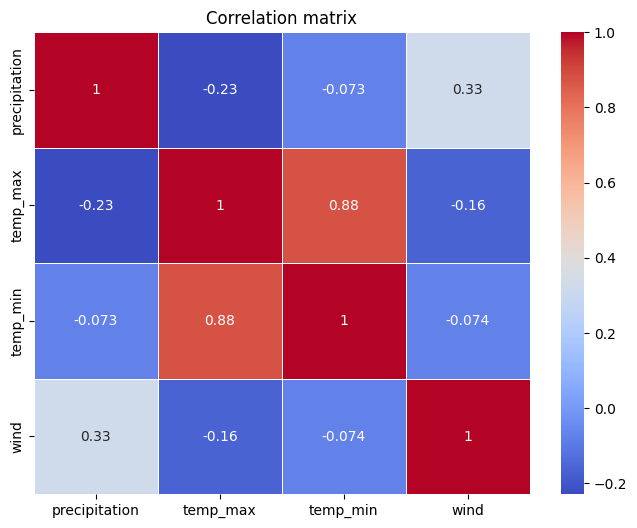

In [ ]:
# matrix correlation
correlation_matrix = df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()


**Comments :**

The strongest correlation is between temp_max and temp_min, which makes sense because they are both measures of temperature.

The other correlations are weaker.
 For example, there is a small negative correlation between precipitation and temp_max, which means that fewer precipitation is associated with higher maximum temperatures. There is also a small negative correlation between wind and temp_max, which means that higher wind speeds are associated with lower maximum temperatures.

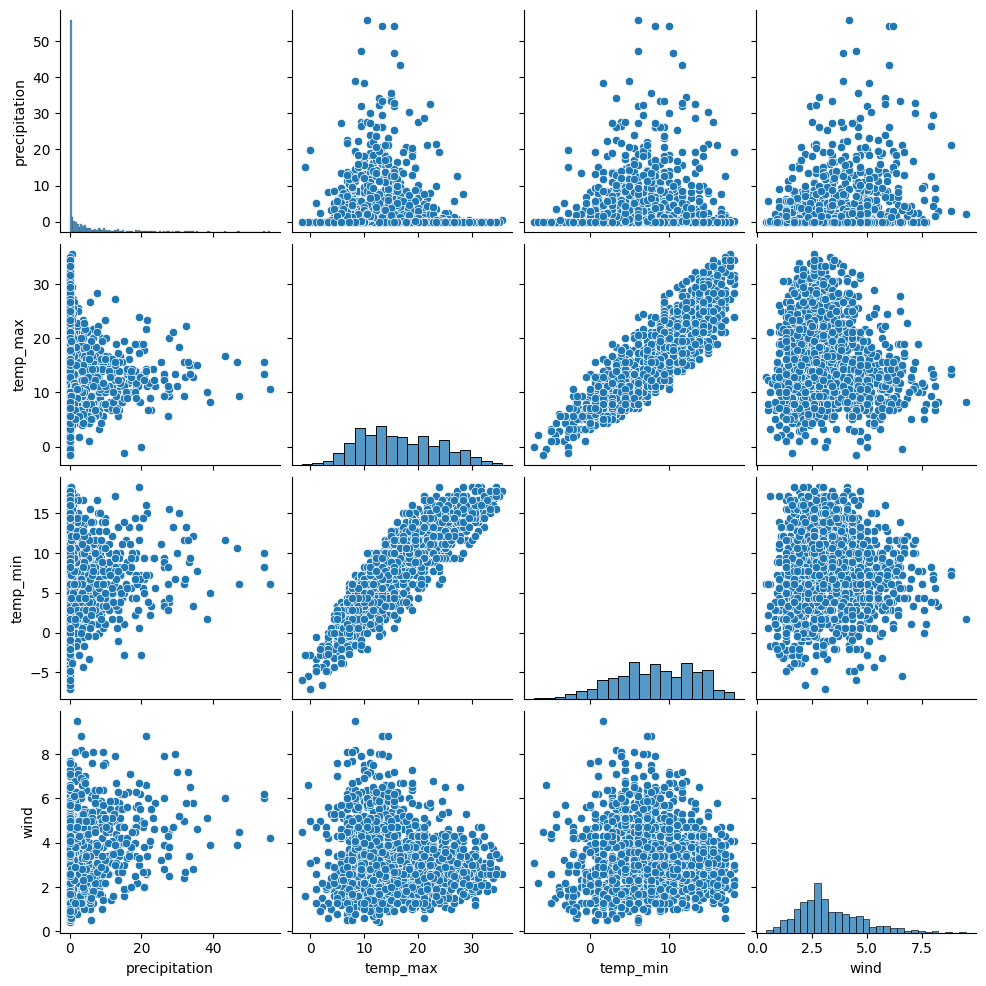

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter matrix plot
sns.pairplot(df[['precipitation', 'temp_max', 'temp_min', 'wind']]),
plt.show()


**Precipitation and Maximum Temperature**: There seems to be a slight positive trend between these two variables, suggesting that as precipitation increases, the maximum temperature also tends to increase slightly. However, the relationship is not very strong, indicating that other factors might influence the maximum temperature.

**Maximum Temperature and Minimum Temperature**: There's a very strong positive correlation between these two. This makes sense, as on days when the highest temperature is high, the lowest temperature is usually high too.

**Minimum Temperature and Wind**: There's a very slight negative trend, but it's quite weak. This suggests that as the minimum temperature decreases, the wind speed might increase slightly. However, this relationship is very weak and other factors likely have a bigger impact on wind speed.

**Precipitation and Wind**: There doesn't seem to be a clear relationship between these two. The points are scattered randomly on the graph, suggesting that precipitation and wind speed are independent of each other.

**Conclusion of the EDA:**

Unfortunately, apart from the correlation between the maximum temperature (temp_max) and the minimum temperature (temp_min), there are no other significant correlations that could be exploited to potentially reduce the number of features.

# **Creation of the training dataset**

We want to use the temp_max column to train our data.

In [ ]:
#Pick the column temp_max for the training data and converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [ ]:
#Verify that we took all the element of the column
len(training_set)

1461

We will use the **Sliding window**: A technique where the window moves forward by one step at a time, and each window is used to make predictions or train a model. This helps capture temporal dependencies in time series data.

**Example :**

For a time series : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

If we use a window size of 3, the windows would look like:

* Window 1: [1, 2, 3] —> Predict the value at the next time step (4).
* Window 2: [2, 3, 4] —> Predict the value at the next time step (5).
* Window 3: [3, 4, 5] —> Predict the value at the next time step (6).
* And so on...

The function transforms the dataframe into a format where each input (X_train) consists of a sequence of historical values , and the corresponding output (y_train) is the value to predict (e.g., the maximum temperature for the next day).



In [ ]:
def df_to_XY(df, window_size=10):
    # Initialize lists to store training data (inputs and targets)
    X_train = []
    y_train = []

    # Loop through the dataset starting from index 'window_size' to create sequences
    for i in range(10, len(training_set)):
        # Append the last 'window_size' values as input features for each sequence
        X_train.append(training_set[i-10:i, 0])  # Taking the last 10 data points as input
        # Append the next value (target) to the output list (what we're trying to predict)
        y_train.append(training_set[i, 0])  # The value we want to predict (e.g., temp_max)

    # Convert the lists to numpy arrays for model training
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Return the prepared input and output data
    return X_train, y_train


In [ ]:
# Define the window size for creating input-output sequences
WINDOW = 10

# Call the function to transform the dataframe into input-output pairs based on the window size
X, y = df_to_XY(df, WINDOW)

# Print the lengths of the input and output arrays to check how many samples have been created
print(len(X), len(y))

# Split the data into training, validation, and test sets
X_train = X[:800]  # First 800 samples for training
y_train = y[:800]  # Corresponding targets for training

X_val = X[800:1000]  # Next 200 samples (from 800 to 999) for validation
y_val = y[800:1000]  # Corresponding targets for validation

X_test = X[1000:]  # Remaining samples (from 1000 onwards) for testing
y_test = y[1000:]  # Corresponding targets for testing


1451 1451


RNNs expect inputs in the shape (samples, time_steps, features) because they process data sequentially (across time). The network needs to understand how each time step is related to previous time steps.

In this case, reshaping allows the RNN to recognize that it should treat each sequence of 10 (window) time steps as a separate sample and that each time step in the sequence contains only one feature.

So we need to reshape our data to: (n_samples, n_timesteps) => (n_samples, n_timesteps, n_features)

In [ ]:
#Reshaping (To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


# **Build of the RNN model**

We will use a  Recurrent Neural Network (RNN), specifically an LSTM (Long Short-Term Memory) network.

It is commonly used for time series forecasting tasks, like predicting weather or stock prices, because it is designed to capture temporal dependencies in data, meaning it can learn from sequences of past data points to predict future values.

Let's explain a little bit more this choice :


*   **Time Series Data**: The problem involves predicting future weather conditions (e.g., the maximum temperature) based on historical data, which is inherently sequential. LSTMs are well-suited for such tasks because they are capable of learning patterns over time and can capture long-term dependencies in sequences.

* **Handling Long-Term Dependencies**: LSTM networks are specifically designed to solve issues that traditional RNNs face, such as vanishing gradients, and are able to "remember" information from earlier time steps, which is essential for time series forecasting.




In [ ]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

We initialize the model

In [ ]:
regressor = Sequential()

Then we will add the LSTM layer of the model.

* The first LSTM layer is added. This layer will have 50 units (neurons). The return_sequences=True argument ensures that this layer outputs the full sequence of outputs (not just the final output). This is necessary because the next LSTM layers will take this sequence as input. The input shape is for having only one feature.

* Then a droupout layer which will be applied after each LSTM layer (except the last one).

* Three more LSTM layers are added, each with 50 units. The first three LSTM layers have return_sequences=True because they need to return a sequence that will be used by the next LSTM layer. The final LSTM layer does not need to return sequences, so return_sequences is set to False (by default).

* The final layer is a fully connected (dense) layer with 1 unit. It is used to output the prediction. Since this is a regression problem , the output layer has a single neuron with no activation function (i.e., linear activation by default).


 The **dropout** is a regularization technique that helps prevent overfitting by randomly setting a fraction (20% in this case) of the input units to zero at each update during training. This helps the model generalize better.

**Why this architecture?**

By stacking multiple LSTM layers, the model can learn increasingly complex temporal patterns. Each LSTM layer learns different aspects of the sequential data, and stacking layers helps the model capture both short-term and long-term dependencies.

The use of dropout helps to prevent overfitting, which is especially important when dealing with time series data where the model might otherwise memorize the training data without generalizing well to unseen data.

The dense layer outputs a single prediction, which in the case of weather forecasting could be the temperature for the next day. Since the task is regression (predicting a continuous value), the dense layer has just 1 unit and no activation function.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

# Initialize the model
regressor = Sequential()

# Add Input layer first to specify the input shape
regressor.add(Input(shape=(X_train.shape[1], 1)))

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding additional LSTM layers
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))


In [ ]:
# Compiling the model
regressor.compile(optimizer='adam',loss='mean_squared_error')

Let's talk about the parameter selected :     


*   The optimizer is responsible for updating the model's weights during training in order to minimize the loss function.


*   The loss function measures how well the model's predictions match the actual values. During training, the optimizer tries to minimize the loss by adjusting the model's weights.






**The optimizer**

Adam (Adaptive Moment Estimation) is an optimization algorithm used in training machine learning models, particularly deep learning models like neural networks. It is widely used because it combines the best features of two popular optimization algorithms: AdaGrad and RMSProp, and performs well in a wide range of tasks with minimal tuning of hyperparameters

Adam is an extension of stochastic gradient descent (SGD) that computes adaptive learning rates for each parameter by keeping track of both the first moment (mean) and the second moment (uncentered variance) of the gradients. This makes Adam particularly well-suited for problems with large datasets, noisy gradients, and sparse gradients (e.g., when training on time series or in natural language processing).

Adam has two key features:

* **Adaptive learning rate**: Instead of using a fixed learning rate across all parameters, Adam adjusts the learning rate for each parameter individually.
* **Momentum**: It incorporates both the current and past gradients to smooth out updates, allowing it to converge faster.

**Algorithm of ADAM :**

 Adam introduces momentum by updating the velocity (v) using a weighted sum of past gradients, which helps smooth the updates and accelerates convergence:

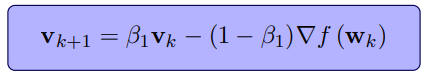

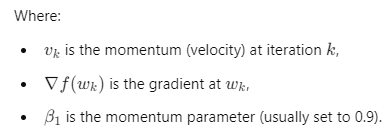

Adam uses the squared gradient to adaptively scale the learning rate for each parameter:

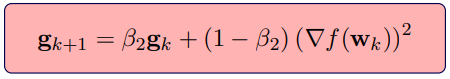


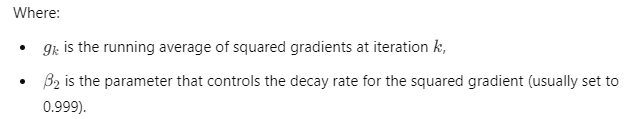

The model parameters are updated using both the momentum and the adapted learning rate, taking into account the bias correction:

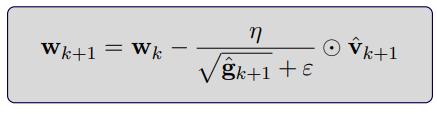

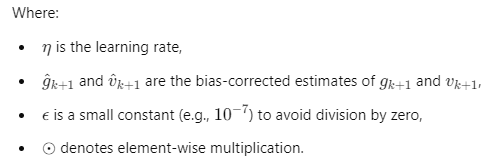

They use bias correction to avoid large update steps at the beginning of training, Adam applies bias correction to the first and second moments:

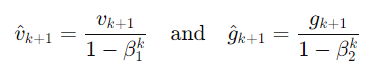

**The loss function**

**Mean Squared Error** (MSE) is a commonly used loss function in regression problems.

It is defined as the average of the squared differences between the predicted values and the actual values.

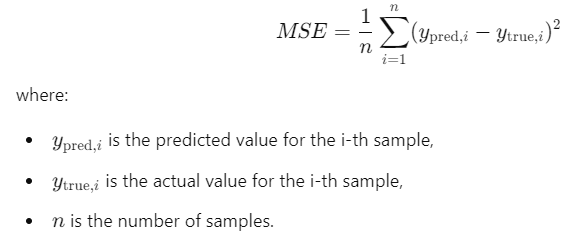

**Why this choice of loss function ?**

Since the goal of this model is to predict continuous values (e.g., temperature), MSE is the appropriate loss function for regression tasks.

MSE heavily penalizes larger errors because it squares the differences. This makes it sensitive to outliers, which can help the model focus on reducing large errors.

MSE has a straightforward mathematical form, making it easy to compute and optimize.


**Training of the model**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam




*   **The number of epochs** defines how many times the model will iterate over the entire training dataset. More epochs allow the model to learn better, but too many epochs can lead to overfitting.

*   **The batch size** is the number of samples processed before the model's internal parameters are updated. A batch size of 32 means that after processing 32 samples, the model will update its weights. Larger batch sizes tend to provide more stable gradients but require more memory, while smaller batch sizes provide more noisy updates but can potentially converge faster.



In [ ]:
# Fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 239.0883 - val_loss: 270.4549
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 121.7303 - val_loss: 182.4247
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 84.3502 - val_loss: 151.7430
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 66.8209 - val_loss: 130.7482
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 69.8003 - val_loss: 114.6145
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 62.7774 - val_loss: 101.8986
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 56.0161 - val_loss: 94.0172
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 54.1138 - val_loss: 87.0287
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 51.0819 - val_loss: 83.0544
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 55.3098 - val_loss: 80.3834
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 50.3903 - val_loss: 79.0119
Epoch 12/100
25/25 ━━━

In [ ]:
his = pd.DataFrame(history.history)

In [ ]:
his.head()

,loss,val_loss
0,207.293823,270.454926
1,104.382721,182.424744
2,79.628952,151.743027
3,69.477989,130.748199
4,62.653309,114.614525


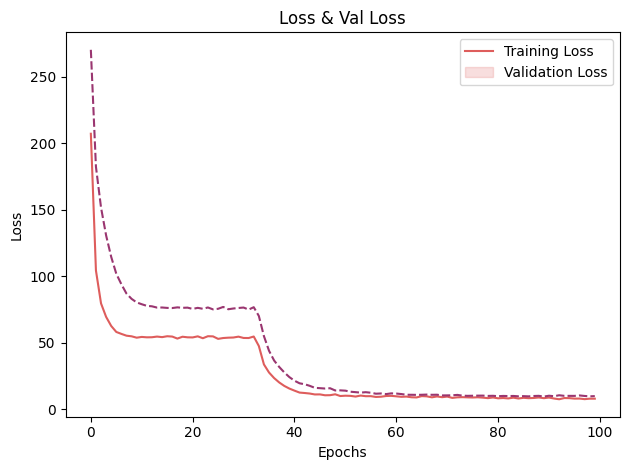

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'his' is the DataFrame containing the training history
history_loss = his[['loss', 'val_loss']]

plt.title("Loss & Val Loss")

# Create the lineplot for training and validation loss
sns.lineplot(data=history_loss, palette="flare")

# Add labels to the graph
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend(labels=['Training Loss', 'Validation Loss'], loc='upper right')  # Legend to differentiate the two lines

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


* **Training Loss:** Shows how well the model is fitting the training data. A decreasing training loss typically indicates that the model is learning.
* **Validation Loss:** Shows how well the model generalizes to unseen data. If the validation loss is increasing while the training loss is decreasing, it could indicate overfitting.

The two curves (training loss and validation loss) are converging towards a similar value close to 0, indicating that the model is performing well on both the training and validation data. This suggests that the model is not overfitting, as it is generalizing effectively to unseen data, rather than memorizing the training set.

# **Visualization of the reslts**

In [ ]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


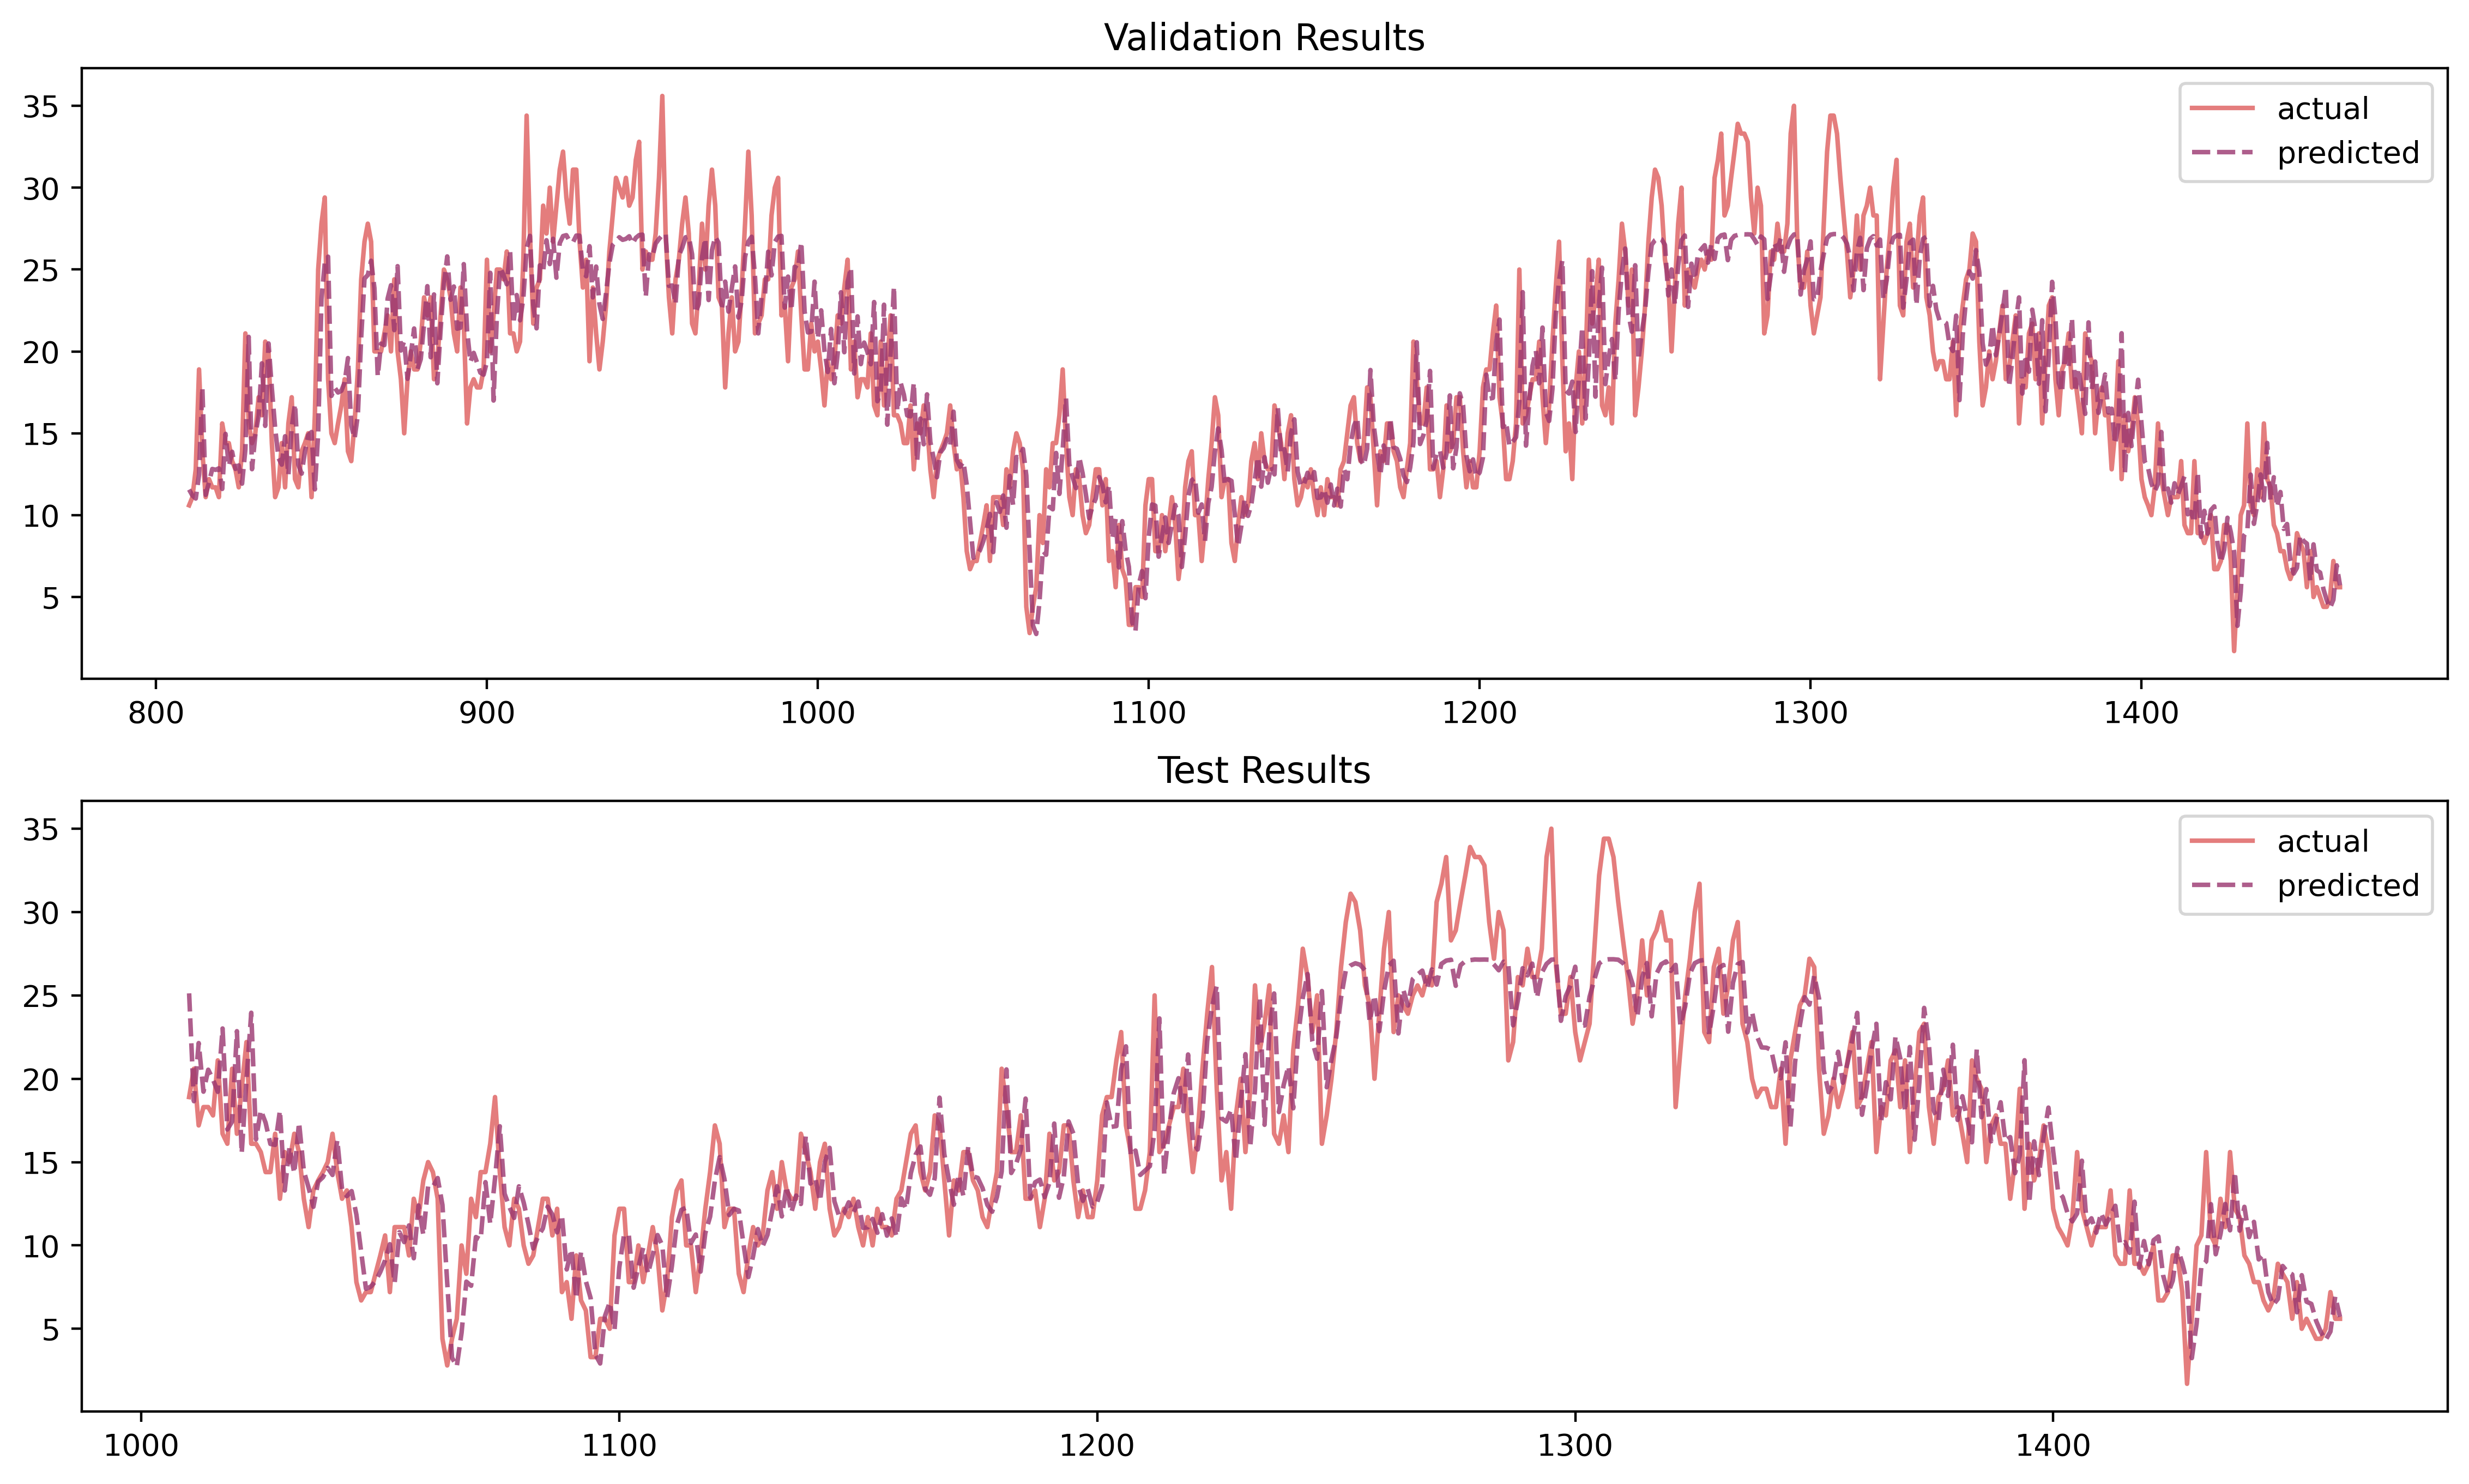

In [ ]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);

* **Validation Results**: In the first subplot, you can see the actual vs. predicted values for the validation data. The plot should show how well the model is generalizing to unseen data during the validation phase.
* **Test Results:** In the second subplot, you can see the actual vs. predicted values for the test data. This gives an idea of the model's performance on completely unseen data.

We can observe that the predicted values closely follow the overall trend of the actual data in most cases.

 However, there are some areas where the predictions deviate from the real values, indicating moments of higher prediction error. These discrepancies may arise due to the model's inability to capture certain complex patterns or fluctuations in the data.

In [ ]:
# prompt: Evaluate the model

# Evaluate the model using metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

train_mae = mean_absolute_error(y_train, train_pred)
val_mae = mean_absolute_error(y_val, val_pred)
test_mae = mean_absolute_error(y_test, test_pred)


train_r2 = r2_score(y_train, train_pred)
val_r2 = r2_score(y_val, val_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Test RMSE: {test_rmse}")

print(f"Train MAE: {train_mae}")
print(f"Validation MAE: {val_mae}")
print(f"Test MAE: {test_mae}")

print(f"Train R^2: {train_r2}")
print(f"Validation R^2: {val_r2}")
print(f"Test R^2: {test_r2}")

Train RMSE: 2.4690378783860614
Validation RMSE: 3.1428157214228833
Test RMSE: 2.956172032296848
Train MAE: 1.9298372023105623
Validation MAE: 2.468065754890442
Test MAE: 2.317652069121401
Train R^2: 0.884198174468456
Validation R^2: 0.6928789101417299
Test R^2: 0.8277860786422625


The train RMSE of 2.54 indicates that the model's predictions on the training set are reasonably close to the actual values. The lower the RMSE, the better the model is at predicting the target variable (in this case, temperature). A value of 2.54 means the model is performing well in capturing the general patterns in the training data.

The validation RMSE of 3.19 is slightly higher than the training RMSE. This suggests that while the model generalizes well, it has a bit more difficulty predicting on unseen validation data compared to the training set. The increase in RMSE could be a sign of slight overfitting, meaning the model fits the training data well but struggles a bit more with generalization.

The test RMSE of 2.93 is also slightly higher than the training RMSE, but it is relatively close to the validation RMSE. This indicates that the model is performing quite well on completely unseen data (test data), with only a small deviation from the training performance. The consistency between the validation and test RMSE values suggests the model's generalization ability is relatively good.

The train R-squared of 0.88 indicates that the model explains 88% of the variance in the training data. This is a high value, meaning the model fits the training data very well and captures most of the variance in the temperature predictions.

The validation R-squared of 0.68 suggests that the model explains 68% of the variance in the validation data. Although this is still a decent value, it is noticeably lower than the training R², which could indicate some overfitting. The drop in R² between training and validation datasets is typical when a model performs better on the training data than on unseen data, which could be caused by the model memorizing patterns specific to the training data.

The test R-squared of 0.83 suggests that the model explains 83% of the variance in the test data. This is a strong value, showing that the model is able to generalize well to completely unseen data. The test R² being quite close to the training R² is a positive sign, meaning the model has not overfitted and is generalizing well.




# **Tunning of the model**

In the context of weather prediction, where the goal is to predict the maximum temperature (temp_max) based on historical weather data, the following RNN-specific hyperparameters are particularly important:

* **Sequence Length**: The length of the time window of historical data used to predict the next day’s temperature (e.g., the last 7 days of weather data to predict the temperature for the 8th day).
Hidden Layer Size: The number of neurons in the hidden layers of the RNN (e.g., 50, 100, or 200 hidden units).

* **Number of Layers:** The depth of the RNN (e.g., 1-layer, 2-layer, or deeper architectures such as stacked LSTMs).

* **Dropout:** The fraction of neurons randomly ignored during training to prevent overfitting (e.g., 0.2, 0.5).

* **Batch Size:** The number of data points used to calculate each update in training (e.g., 32 or 64).

* **Learning Rate:** Controls the speed of learning and convergence (e.g., 0.001, 0.01).

* **Optimizer:** Common choices for RNNs include Adam and RMSprop, which adapt the learning rate during training.

* **Activation Function**: ReLU and tanh are popular activation functions for RNNs. Tanh is often used for LSTMs and GRUs.


Here in this regressor2 we decides to change the number of neurons from 50 to 100.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input

# Initialize the model
regressor2 = Sequential()

# Add Input layer first to specify the input shape
regressor2.add(Input(shape=(X_train.shape[1], 1)))

# Adding the first LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units=100, return_sequences=True))
regressor2.add(Dropout(0.2))

# Adding additional LSTM layers
regressor2.add(LSTM(units=100, return_sequences=True))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units=100, return_sequences=True))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units=100))
regressor2.add(Dropout(0.2))

# Output layer
regressor2.add(Dense(units=1))


In [ ]:
# Compiling the model
regressor2.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Fitting the rnn to the training set
history2=regressor2.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=64)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - loss: 7.7626 - val_loss: 10.1227
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 7.3415 - val_loss: 9.8724
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 6.8104 - val_loss: 10.2067
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 6.7097 - val_loss: 9.9547
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 6.4927 - val_loss: 9.8120
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 6.7653 - val_loss: 9.6822
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 6.3261 - val_loss: 9.7231
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 6.6873 - val_loss: 10.7238
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 7.3170 - val_loss: 10.1419
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 6.4215 - val_loss: 9.8482
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 6.9887 - val_loss: 9.7159
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78

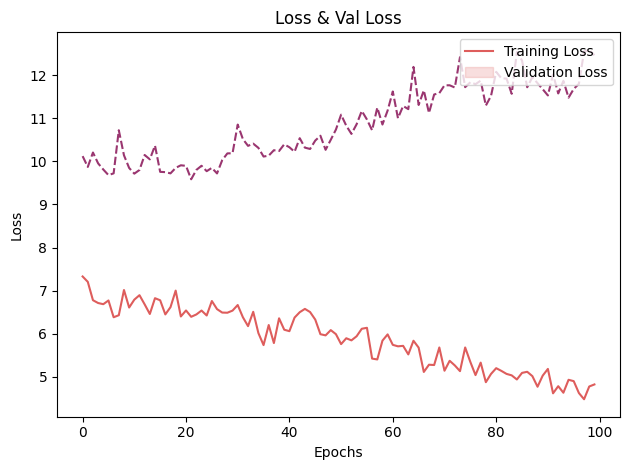

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

his2 = pd.DataFrame(history2.history)
# 'his' is the DataFrame containing the training history
history_loss2 = his2[['loss', 'val_loss']]

plt.title("Loss & Val Loss")

# Create the lineplot for training and validation loss
sns.lineplot(data=history_loss2, palette="flare")

# Add labels to the graph
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend(labels=['Training Loss', 'Validation Loss'], loc='upper right')  # Legend to differentiate the two lines

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:

train_pred2 = regressor2.predict(X_train).flatten()
val_pred2 = regressor2.predict(X_val).flatten()
test_pred2 = regressor2.predict(X_test).flatten()

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
train_rmse2 = np.sqrt(mean_squared_error(y_train, train_pred2))
val_rmse2 = np.sqrt(mean_squared_error(y_val, val_pred2))
test_rmse2 = np.sqrt(mean_squared_error(y_test, test_pred2))

train_mae2 = mean_absolute_error(y_train, train_pred2)
val_mae2 = mean_absolute_error(y_val, val_pred2)
test_mae2 = mean_absolute_error(y_test, test_pred2)

train_r22 = r2_score(y_train, train_pred2)
val_r22 = r2_score(y_val, val_pred2)
test_r22 = r2_score(y_test, test_pred2)

print(f"Train RMSE: {train_rmse2}")
print(f"Validation RMSE: {val_rmse2}")
print(f"Test RMSE: {test_rmse2}")

print(f"Train MAE: {train_mae2}")
print(f"Validation MAE: {val_mae2}")
print(f"Test MAE: {test_mae2}")

print(f"Train R^2: {train_r22}")
print(f"Validation R^2: {val_r22}")
print(f"Test R^2: {test_r22}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Train RMSE: 1.8384869757231717
Validation RMSE: 3.5307299443595053
Test RMSE: 3.148612871450647
Train MAE: 1.4285065665096044
Validation MAE: 2.7505903100967406
Test MAE: 2.4391401893019413
Train R^2: 0.9357932014851049
Validation R^2: 0.6123847920923584
Test R^2: 0.8046347213925052


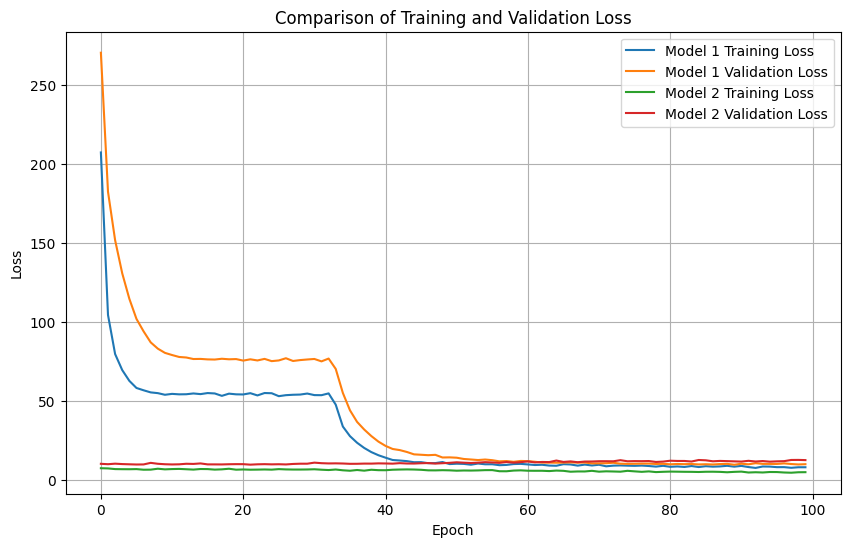

Model 1 R-squared Scores:
  Train: -4.380474273070319
  Validation: -14.68569799406073
  Test: -5.353476111398284

Model 2 R-squared Scores:
  Train: 0.9357932014851049
  Validation: 0.6123847920923584
  Test: 0.8046347213925052

Model 1 RMSE Scores:
  Train: 2.4690378783860614
  Validation: 3.1428157214228833
  Test: 2.956172032296848

Model 2 RMSE Scores:
  Train: 1.8384869757231717
  Validation: 3.5307299443595053
  Test: 3.148612871450647


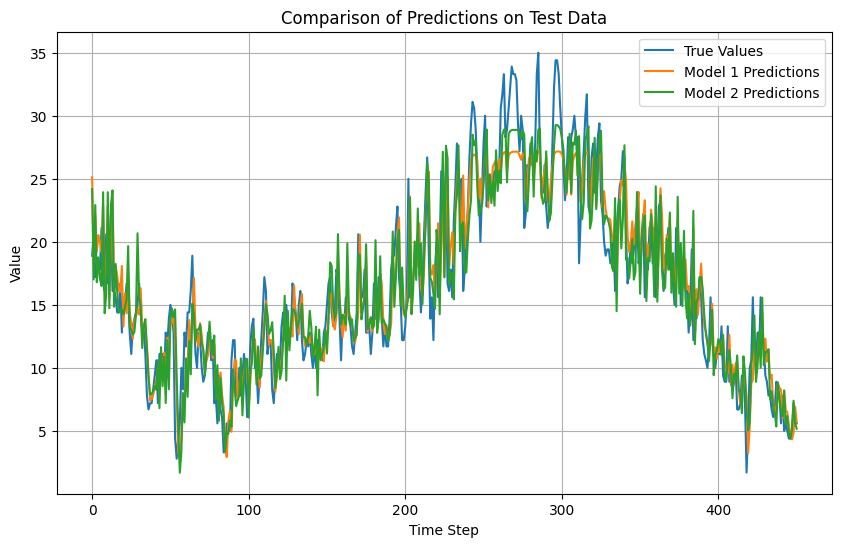

In [ ]:
# prompt: Compare the 2 model

import matplotlib.pyplot as plt

# Assuming 'history' and 'history2' are your training history objects
# and 'train_pred', 'val_pred', 'test_pred', etc. are prediction arrays

# ... (Your existing code for model training and prediction)

# Comparison of Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Model 1 Training Loss')
plt.plot(history.history['val_loss'], label='Model 1 Validation Loss')
plt.plot(history2.history['loss'], label='Model 2 Training Loss')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Comparison of R-squared Scores
print("Model 1 R-squared Scores:")
print(f"  Train: {train_r2}")
print(f"  Validation: {val_r2}")
print(f"  Test: {test_r2}")

print("\nModel 2 R-squared Scores:")
print(f"  Train: {train_r22}")  # Assuming train_r2 is updated for model 2
print(f"  Validation: {val_r22}") # Assuming val_r2 is updated for model 2
print(f"  Test: {test_r22}")  # Assuming test_r2 is updated for model 2

# Comparison of RMSE Scores
print("\nModel 1 RMSE Scores:")
print(f"  Train: {train_rmse}")
print(f"  Validation: {val_rmse}")
print(f"  Test: {test_rmse}")

print("\nModel 2 RMSE Scores:")
print(f"  Train: {train_rmse2}") # You need to calculate and store RMSE for model 2
print(f"  Validation: {val_rmse2}") # You need to calculate and store RMSE for model 2
print(f"  Test: {test_rmse2}") # You need to calculate and store RMSE for model 2

# ... (Add more comparison plots or metrics as needed)

# Example: Comparing Predictions on Test Set
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(test_pred, label='Model 1 Predictions')
plt.plot(test_pred2, label='Model 2 Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Comparison of Predictions on Test Data')
plt.legend()
plt.grid(True)
plt.show()

**Only modify the units of all layer at 100 :**

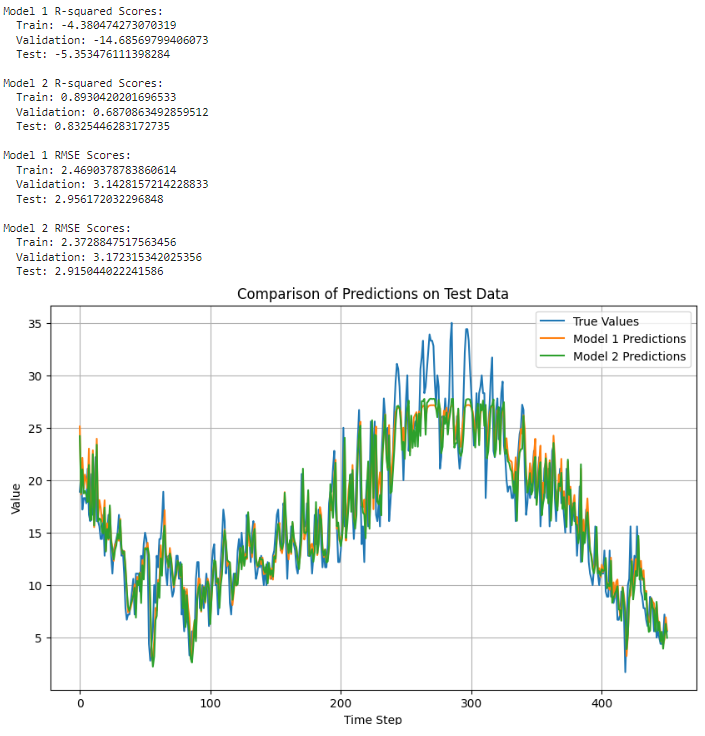

**Modify the units of all layer at 100 and the batch size at 64 :**

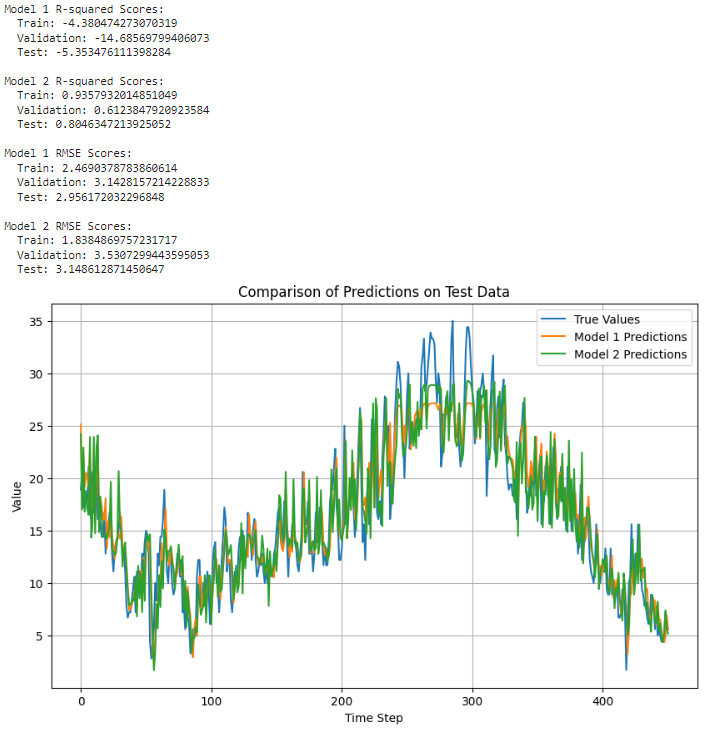

The result of this change seem even better.

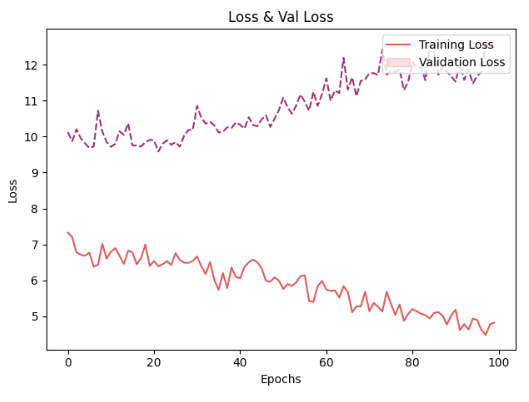

However when we check those results we can see an overfitting

# **Potential Improvements for the LSTM Model**

While the current model provides useful insights, there are several strategies that could be applied to enhance its performance. Unfortunately, due to time constraints, these possibilities were not fully explored, but they offer promising avenues for further experimentation and optimization. Below, I outline some of the key approaches that could improve the model's predictive accuracy, generalization, and computational efficiency.

Increase the Number of Units per Layer
One approach to improving the model’s capacity is to increase the number of units in the LSTM layers. By adding more units, the model would have a greater ability to capture more complex patterns in the data. For example, the number of units could be increased from the current value of 100 to 150 or 200. However, it is important to monitor the model’s performance closely, as a larger model could lead to overfitting, particularly if the dataset is not large enough to support it. Additionally, increasing the number of units will increase the computational cost and training time.

Add More LSTM Layers
Another potential improvement is adding more LSTM layers to the architecture. Additional layers can help the model learn more intricate temporal patterns and relationships in the data. However, caution must be exercised, as adding too many layers can lead to issues such as vanishing or exploding gradients, especially in deep recurrent networks like LSTMs. A careful balance must be struck to prevent overfitting and ensure the model is able to generalize effectively. Adding one or two more layers, while monitoring training closely, might enhance performance without causing detrimental effects.

Increase the Number of Epochs
Extending the number of epochs would allow the model to train for a longer period, potentially improving its ability to learn from the data. This can be particularly useful if the model’s performance continues to improve with more training. However, increasing epochs also runs the risk of overfitting, as the model might begin to memorize the training data rather than generalize from it. To mitigate this, early stopping techniques can be used to halt training once the model’s performance on the validation set plateaus or starts to decline, ensuring that overfitting is avoided.

Adjust Dropout Rate for Better Regularization
The dropout rate plays a critical role in preventing overfitting by randomly dropping neurons during training. If the model is too prone to overfitting, slightly increasing the dropout rate (e.g., from 0.2 to 0.3 or 0.4) could help regularize the model and improve generalization. However, increasing dropout too much might hinder the model's ability to learn meaningful patterns, so it’s essential to strike the right balance.

Use Batch Normalization
Adding BatchNormalization layers after the LSTM layers could improve the model’s convergence and help stabilize the learning process. Batch normalization normalizes the activations of each layer, which can lead to faster training and better generalization. It can also help reduce the effects of vanishing gradients, which can be a problem in deep LSTM networks. Experimenting with the placement of BatchNormalization layers (either before or after the dropout layers) might further optimize the learning process.

Experiment with Different Optimizers
While the Adam optimizer is commonly used and performs well for many tasks, experimenting with other optimizers such as RMSprop or Nadam might lead to better convergence, particularly for sequential data like time-series. Additionally, adjusting the learning rate for the chosen optimizer could help improve the model's ability to minimize the loss function. For example, testing different learning rates or adapting the learning rate schedule could lead to faster and more stable training.

Incorporate Early Stopping
Early stopping is an essential technique for preventing overfitting and saving computational resources. By monitoring the validation loss during training, early stopping can halt the training process once the model’s performance starts to degrade on the validation set. This helps avoid excessive training time and ensures the model does not overfit. Setting a patience parameter (e.g., 10 epochs) can allow the model to continue training if there is a temporary fluctuation in performance, while still preventing unnecessary computation if no further improvement is observed.

Increase the Batch Size
Increasing the batch size can improve the stability of the gradient estimates during training and might help speed up the convergence process. For larger datasets, using a batch size of 64 or 128 instead of 32 can often result in more stable training. However, this also requires sufficient computational resources, as larger batch sizes demand more memory. It is important to monitor the model’s performance when changing the batch size to ensure that it does not negatively affect generalization.

Explore Data Augmentation or Feature Engineering
In cases where the model is not performing as expected, data augmentation or feature engineering might provide significant improvements. For time-series data, adding lagged variables or creating new features that capture temporal relationships could help the model make more accurate predictions. Data augmentation techniques, such as jittering, adding noise, or creating synthetic samples, can also improve the robustness of the model. Enhancing the data can sometimes lead to larger improvements than just tuning the model architecture.